# Chapter 4: Image Enhancement

Excercise 3: Implement Floyd-Steinberg error-diffusion dithering and convert a grayscale image into a binary image.
#Thuật toán Floyd-Steinberg là một phương pháp dithering (phân tán sai số) để chuyển đổi hình ảnh có độ xám thành hình ảnh nhị phân, trong đó các pixel sẽ chỉ có hai giá trị: 0 hoặc 255. Phương pháp này giúp tạo hiệu ứng chuyển màu mượt mà hơn bằng cách lan truyền sai số (error) từ mỗi pixel đến các pixel lân cận.

## 1. Sử dụng các thư viện cơ bản như numpy vf matplotlib để làm việc với ma trận và hiển thị ảnh

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Bước 1: Đọc ảnh và chuyển sang grayscale
im = Image.open('D:\\Image_Processcing_Project\\images\\fish.jpg').convert('L')  # Đọc ảnh và chuyển sang grayscale (L: độ sáng)
im = np.array(im)

## 2. Các bước thực hiện

1. **Tính toán sai số (Error)**:  
   Mỗi pixel trong ảnh có một giá trị màu sắc (giá trị độ xám) nằm trong phạm vi từ 0 đến 255. Khi chuyển pixel này sang màu nhị phân, chúng ta sẽ thay thế giá trị pixel gốc bằng 255 nếu nó lớn hơn 127, hoặc bằng 0 nếu nó nhỏ hơn hoặc bằng 127. Sai số là sự chênh lệch giữa giá trị gốc và giá trị mới.

2. **Lan truyền sai số (Error Diffusion)**:  
   Sau khi tính toán sai số, thuật toán lan truyền sai số này vào các pixel lân cận. Cụ thể, các trọng số được áp dụng cho các pixel kế cận bên phải và phía dưới theo tỷ lệ:
   - Pixel bên phải (x + 1): `7/16`
   - Pixel dưới trái (y + 1, x - 1): `3/16`
   - Pixel dưới (y + 1, x): `5/16`
   - Pixel dưới phải (y + 1, x + 1): `1/16`



In [ ]:

def floyd_steinberg_dithering(image):
    # Kích thước ảnh
    height, width = image.shape
    
    # Tạo ảnh kết quả với giá trị nhị phân (0 hoặc 255)
    dithered_image = np.zeros_like(image)

    # Duyệt qua từng pixel
    for y in range(height):
        for x in range(width):
            old_pixel = image[y, x]
            new_pixel = 255 if old_pixel > 127 else 0  # Lựa chọn giá trị mới (0 hoặc 255)
            dithered_image[y, x] = new_pixel  # Gán pixel mới vào ảnh kết quả

            # Tính sai số (error) và lan truyền vào các pixel kế cận
            error = old_pixel - new_pixel

            # Lan truyền sai số sang các pixel lân cận
            if x + 1 < width:
                image[y, x + 1] += error * 7 / 16  # Pixel bên phải
            if y + 1 < height:
                if x - 1 >= 0:
                    image[y + 1, x - 1] += error * 3 / 16  # Pixel dưới trái
                image[y + 1, x] += error * 5 / 16  # Pixel dưới giữa
                if x + 1 < width:
                    image[y + 1, x + 1] += error * 1 / 16  # Pixel dưới phải

    return dithered_image

# Bước 3: Áp dụng thuật toán Floyd-Steinberg
dithered_im = floyd_steinberg_dithering(im.copy())



**3. Hiển thị ảnh

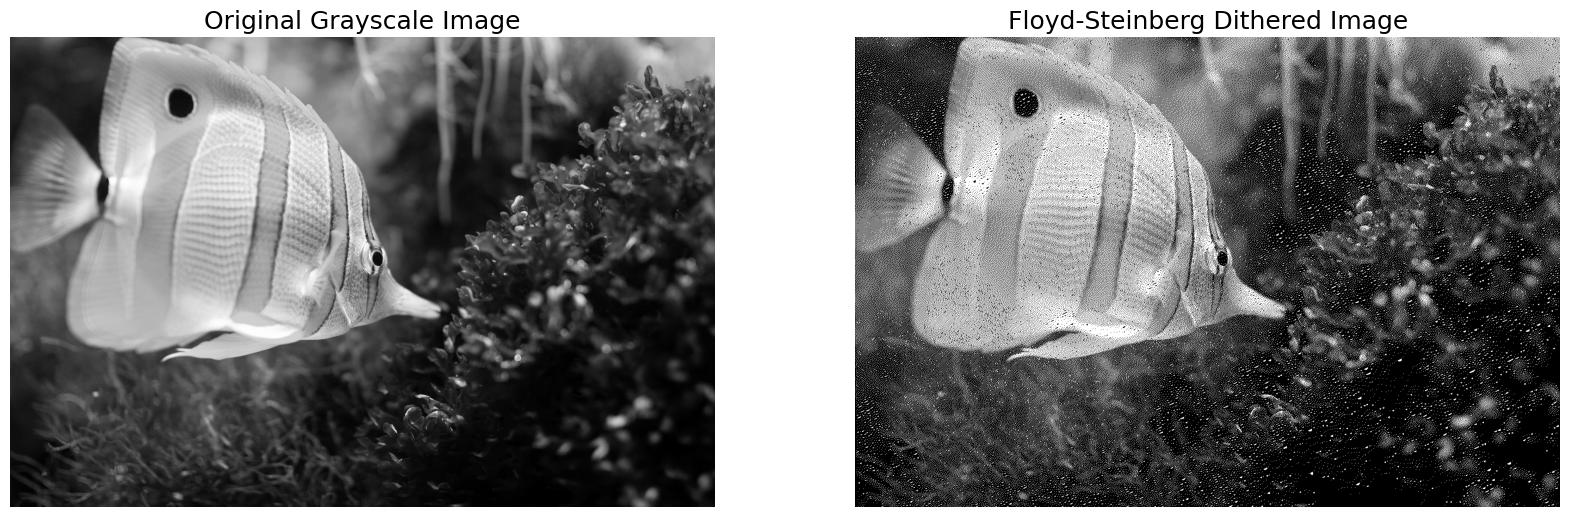

In [7]:
# Bước 4: Hiển thị ảnh
plt.figure(figsize=(20, 8))

# Hiển thị ảnh gốc và ảnh đã dithering
plt.subplot(1, 2, 1)
plt.imshow(im, cmap='gray')
plt.title("Original Grayscale Image", fontsize=18)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(dithered_im, cmap='gray')
plt.title("Floyd-Steinberg Dithered Image", fontsize=18)
plt.axis('off')

# Hiển thị ảnh với độ phân giải lớn hơn và các tiêu đề rõ ràng
plt.show()